In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv
/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv


In [23]:
import pandas as pd

df = pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv')

df.head()

import pandas as pd
import numpy as np
import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.

    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object.

    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

In [28]:

df.info()
df.isna().sum()

df['budget'] = df['budget'].fillna(df['budget'].mean())
df = df.dropna(subset=['genres'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [25]:
df.describe()

budget             id   popularity       revenue      runtime  \
count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4801.000000   
mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.875859   
std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.611935   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   118.000000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count  
count   4803.000000   4803.000000  
mean       6.092172    690.217989  
std        1.194612   1234.585891  
min        0.000000      0.000000  
25%        5.600000     54.000000  
50%        6.200000    235.000000  
75%        6.800000    737.000000  
max       10.000000  13752.000000

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


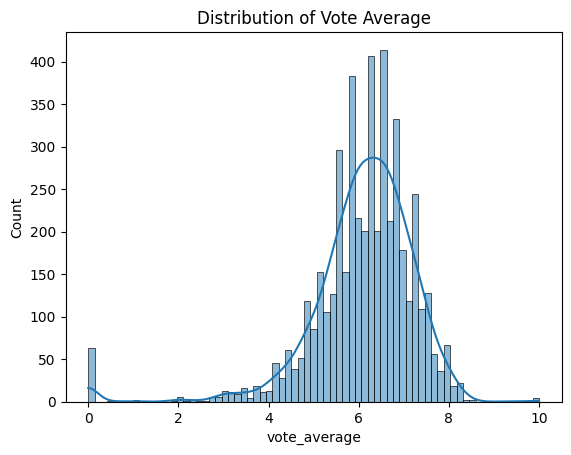

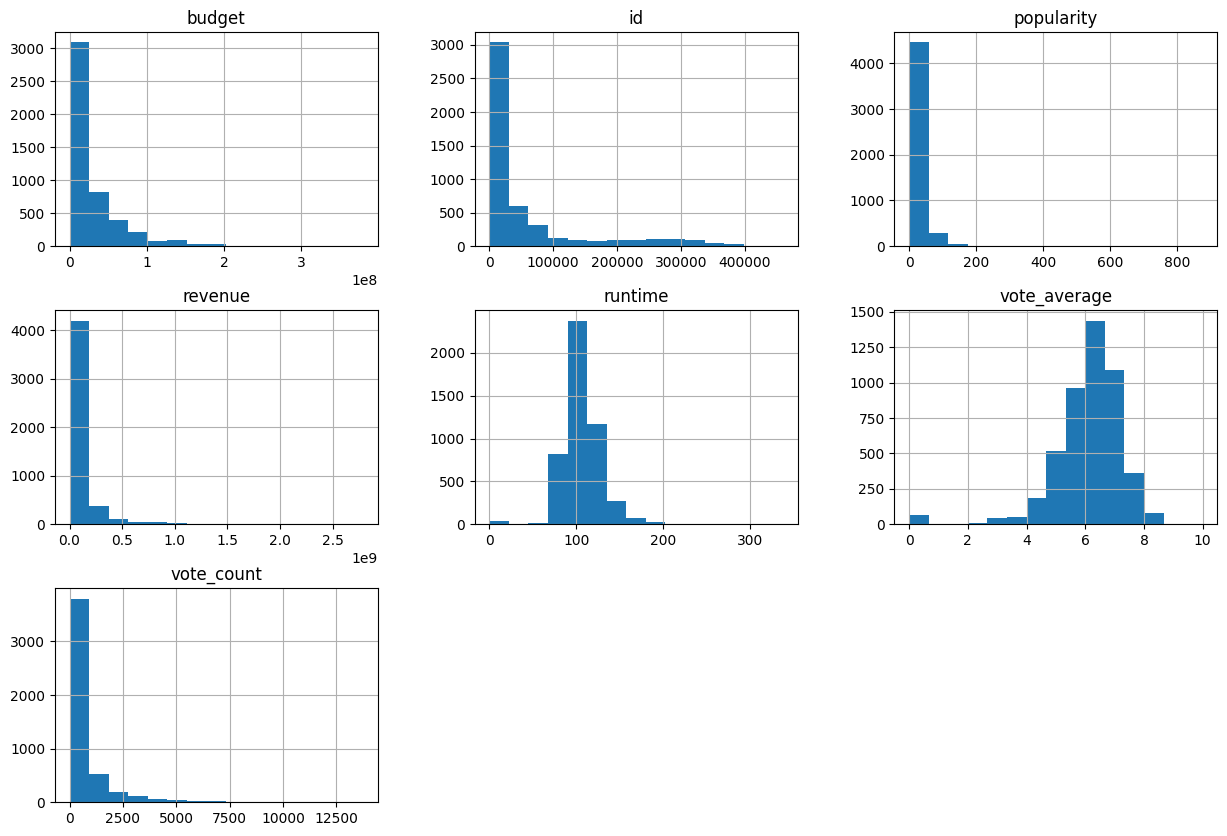

budget             id   popularity  \
count  4.803000e+03    4803.000000  4803.000000   
mean   2.904504e+07   57165.484281    21.492301   
min    0.000000e+00       5.000000     0.000000   
25%    7.900000e+05    9014.500000     4.668070   
50%    1.500000e+07   14629.000000    12.921594   
75%    4.000000e+07   58610.500000    28.313505   
max    3.800000e+08  459488.000000   875.581305   
std    4.072239e+07   88694.614033    31.816650   

                        release_date       revenue      runtime  vote_average  \
count                           4802  4.803000e+03  4801.000000   4803.000000   
mean   2002-12-27 23:45:54.352353280  8.226064e+07   106.875859      6.092172   
min              1916-09-04 00:00:00  0.000000e+00     0.000000      0.000000   
25%              1999-07-14 00:00:00  0.000000e+00    94.000000      5.600000   
50%              2005-10-03 00:00:00  1.917000e+07   103.000000      6.200000   
75%              2011-02-16 00:00:00  9.291719e+07   118.000000      6.800000   
max              2017-02-03 00:00:00  2.787965e+09   338.000000     10.000000   
std                              NaN  1.628571e+08    22.611935      1.194612   

         vote_count  
count   4803.000000  
mean     690.217989  
min        0.000000  
25%       54.000000  
50%      235.000000  
75%      737.000000  
max    13752.000000  
std     1234.585891

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['vote_average'], kde=True)
plt.title('Distribution of Vote Average')
plt.show()
df.select_dtypes(include=['int64', 'float64']).hist(bins=15, figsize=(15,10))
plt.show()

df['genres'] = df['genres'].fillna(df['genres'].mode()[0])
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df.describe()

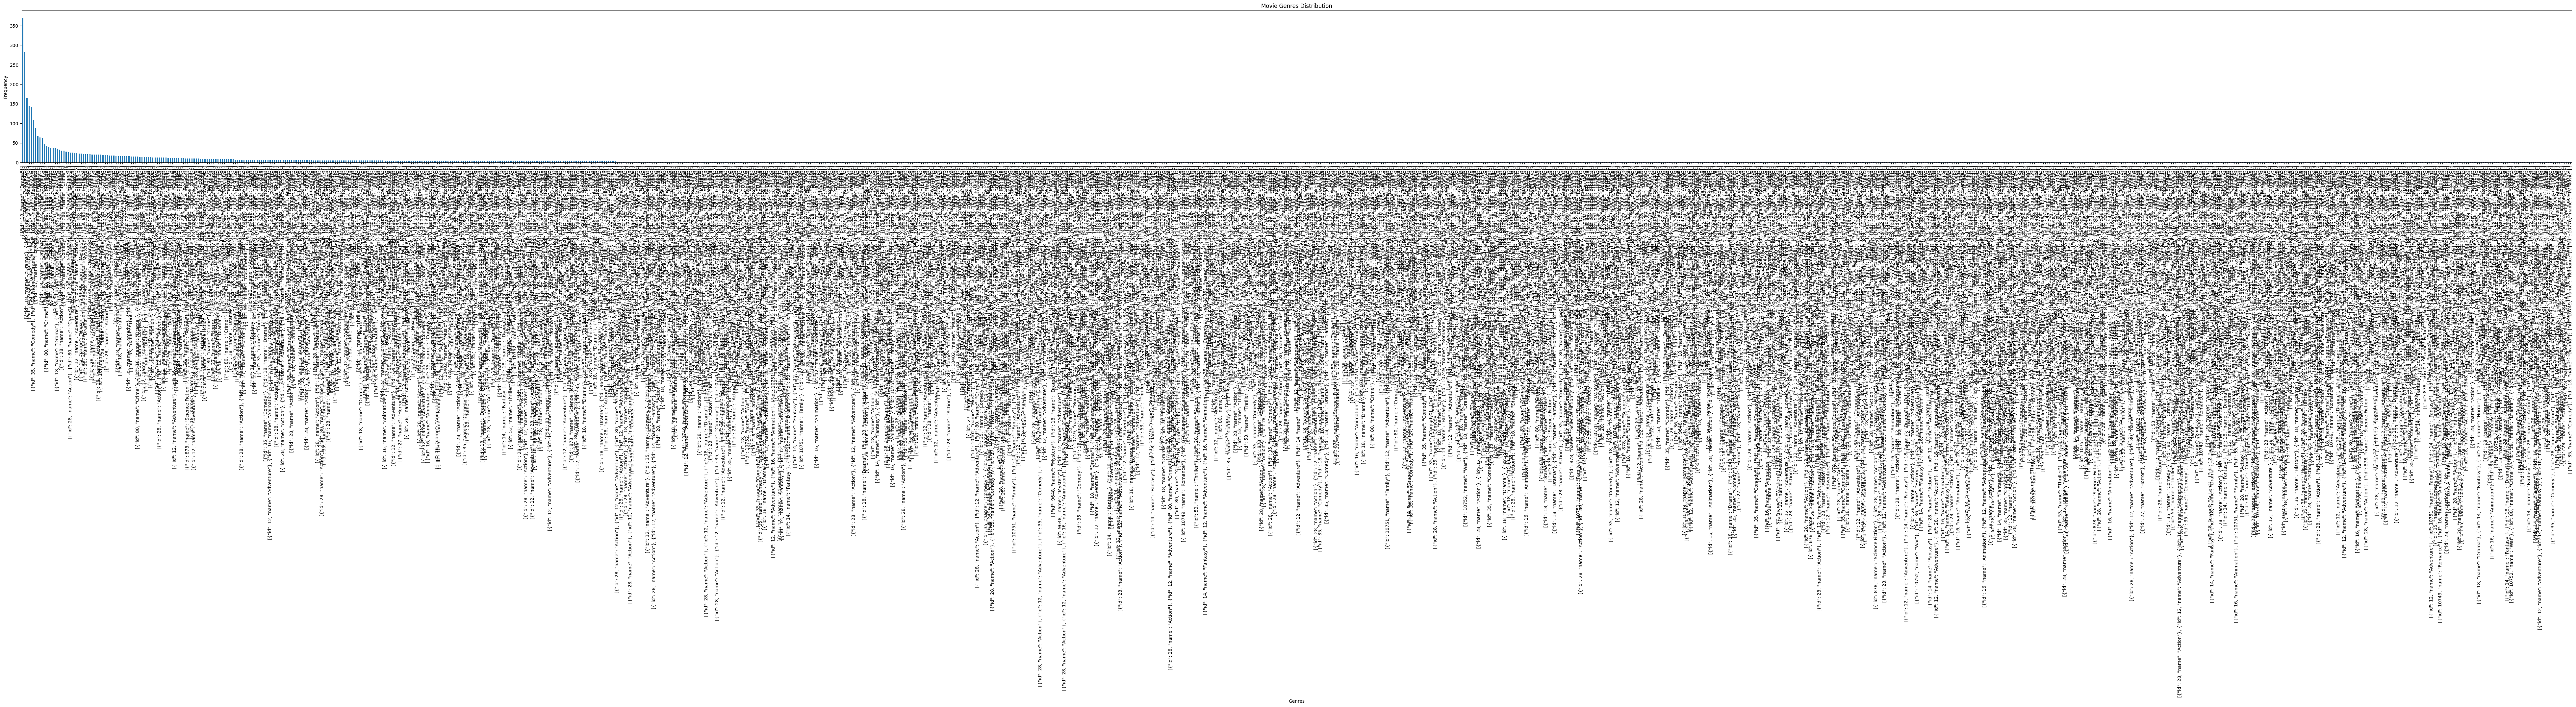

In [38]:
df['genres'].value_counts().plot(kind='bar', figsize=(100, 6))
plt.title('Movie Genres Distribution')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

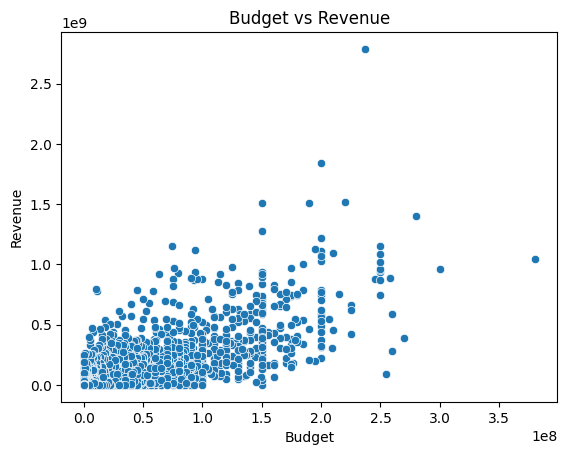

budget   revenue
budget   1.000000  0.730823
revenue  0.730823  1.000000

In [22]:
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

df[['budget', 'revenue']].corr()

In [41]:
df['budget'] = df['budget'].fillna(df['budget'].mean())
df = df.dropna(subset=['genres'])
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
print(df.isna().sum())

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
budget_revenue_diff        0
dtype: int64


In [42]:
df['budget_revenue_diff'] = df['budget'] - df['revenue']